In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
print(784/encoding_dim)

24.5


In [4]:
#use_sparsity_constraint = True
nb_epoch = 100

In [5]:
# this is our input placeholder
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)


W0821 23:09:57.343245 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 23:09:57.360560 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 23:09:57.363055 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [7]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [10]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0821 23:09:57.443207 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 23:09:57.460156 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 23:09:57.463715 140118151415552 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
autoencoder.fit(x_train, x_train,
                epochs=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

W0821 23:09:57.950718 140118151415552 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.3696 - val_loss: 0.2714
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2640 - val_loss: 0.2531
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2436 - val_loss: 0.2322
Epoch 4/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2249 - val_loss: 0.2145
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2092 - val_loss: 0.2009
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1972 - val_loss: 0.1905
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1879 - val_loss: 0.1823
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1806 - val_loss: 0.1757
Epoch 9/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1744 - val_loss: 0.1

60000/60000 [==============================] - 1s 25us/step - loss: 0.0967 - val_loss: 0.0952
Epoch 78/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0967 - val_loss: 0.0951
Epoch 79/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0966 - val_loss: 0.0950
Epoch 80/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0965 - val_loss: 0.0949
Epoch 81/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0964 - val_loss: 0.0949
Epoch 82/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0963 - val_loss: 0.0948
Epoch 83/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0963 - val_loss: 0.0947
Epoch 84/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0962 - val_loss: 0.0947
Epoch 85/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0961 - val_loss: 0.0946
Epoch 86/100
60000/60000 [========================

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [27]:
print(x_test.mean())
print(decoded_imgs.mean())

0.13251467
0.13317312


In [28]:
print(encoded_imgs.mean())
print(encoded_imgs.std())

9.064374
4.7990303


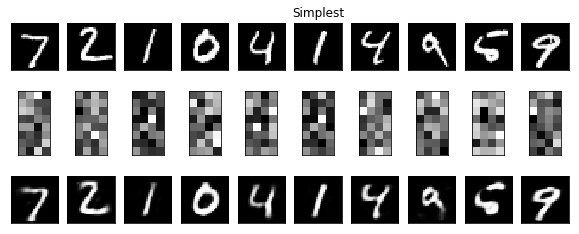

In [23]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    if i==n//2:
        plt.title('Simplest')
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, n, i + 1 + 1*n)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

References
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95